In [1]:
import numpy as np
from pkrr import PKRR
from math import *
import matplotlib.pyplot as plt
import time

In [2]:
from data_datasets import higgs, susy, cod_rna
data = "susy"
# data = "higgs"
# data = "cod_rna"
####################
N = 10000

if data == "higgs":
    X_train, X_test, y_train, y_test = higgs(N)
elif data == "susy":
    X_train, X_test, y_train, y_test = susy(N)
elif data == "cod_rna":
    X_train, X_test, y_train, y_test = cod_rna(N)

print("\nDataset:", data)
print("--------\nShape train data:", X_train.shape)
print("Shape test data:", X_test.shape)


Dataset: susy
--------
Shape train data: (10000, 18)
Shape test data: (10000, 18)


# Fix mu and gamma and vary rank

In [3]:
gamma = np.sqrt(1./6)/100
mu = N*1e-4
n=10
N_list = 1000*np.arange(1,n+1)
colors = plt.cm.tab20(np.arange(n))
N_list, len(colors)

(array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000]),
 10)

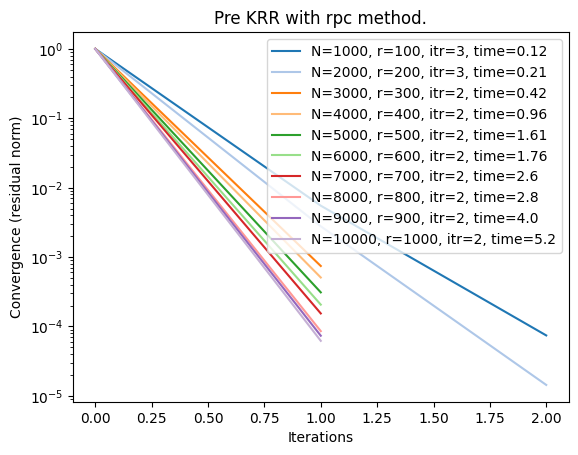

In [9]:
method = "rpc"
fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Convergence (residual norm)')
ax.set_title(f'Pre KRR with {method} method.')

models_residuals = []
models_time =[]
for i, NN in enumerate(N_list):
    rank = int(NN/10)
    
    start_time = time.time()
    model = PKRR(mu=mu, rank=rank, prec=method, gamma=gamma)
    model.fit(X_train=X_train[:NN], y_train=y_train[:NN])
    end_time = time.time()
    duration = end_time - start_time
    models_time.append(duration)
    m_res = model.residuals
    ax.semilogy(range(len(m_res)), m_res,
                color=colors[i], label=f"N={NN}, r={rank}, itr={len(m_res)}, time={round(duration,2)}")
ax.legend()
plt.show()

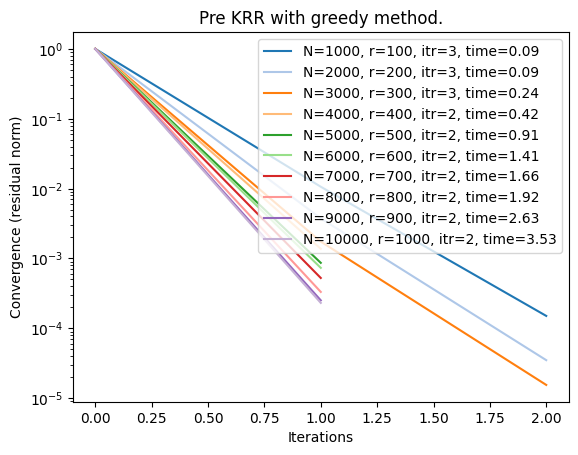

In [10]:
method = "greedy"
fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Convergence (residual norm)')
ax.set_title(f'Pre KRR with {method} method.')

models_residuals = []
models_time = []
for i, NN in enumerate(N_list):
    rank = int(NN/10)

    start_time = time.time()
    model = PKRR(mu=mu, rank=rank, prec=method, gamma=gamma)
    model.fit(X_train=X_train[:NN], y_train=y_train[:NN])
    end_time = time.time()
    duration = end_time - start_time
    models_time.append(duration)
    m_res = model.residuals
    ax.semilogy(range(len(m_res)), m_res,
                color=colors[i], label=f"N={NN}, r={rank}, itr={len(m_res)}, time={round(duration,2)}")
ax.legend()
plt.show()

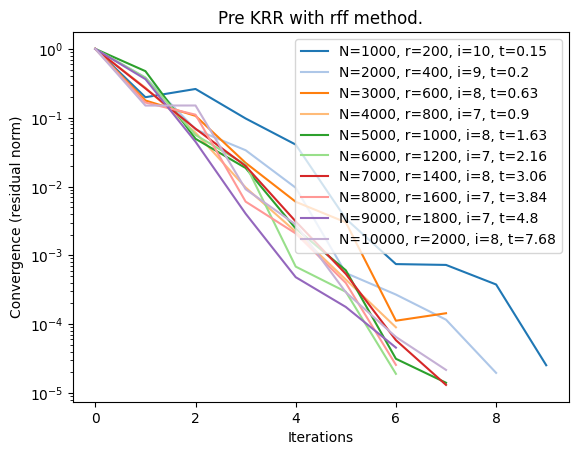

In [13]:
method = "rff"
fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Convergence (residual norm)')
ax.set_title(f'Pre KRR with {method} method.')

models_residuals = []
models_time = []
for i, NN in enumerate(N_list):
    rank = int(NN/5)

    start_time = time.time()
    model = PKRR(mu=mu, rank=rank, prec=method, gamma=gamma)
    model.fit(X_train=X_train[:NN], y_train=y_train[:NN])
    end_time = time.time()
    duration = end_time - start_time
    models_time.append(duration)
    m_res = model.residuals
    ax.semilogy(range(len(m_res)), m_res,
                color=colors[i], label=f"N={NN}, r={rank}, i={len(m_res)}, t={round(duration,2)}")
ax.legend()
plt.show()